## **Trabalho computacional 3**

Códigos utilizados durante o trabalho:

In [4]:
# Importação das bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
# Função para criar os vetores x e fx
def input_vetor():
  ordem=int(input('Quantidade de elementos da função: '))
  x = np.zeros((ordem), dtype='float')
  fx = np.zeros((ordem), dtype='float')

  for i in range(ordem):
    print('elemento ', i+1)
    auxx = float(input('x: ' ))
    x[i] = auxx
    auxfx = float(input('f(x):'))
    fx[i] = auxfx
  print(x)
  print(fx)
  return x, fx

In [6]:
# Função para criar as matrizes do sistema linear obtido 
def spline_quadratica(x, fx):
  n = len(x) # Número de pontos
  ordem_matriz = 3*n-4
  A = np.zeros((ordem_matriz, ordem_matriz)) # inicializamos a matriz contendo apenas zeros

  # Condições de continuidade nos nós internos
  A[0][0] = x[1]
  A[0][1] = 1
  for i in range(n-3):
    coluna = 3*i+2
    linha = 2*i+1
    A[linha][coluna] = x[i+1]**2
    A[linha][coluna+1] = x[i+1]
    A[linha][coluna+2] = 1
    A[linha+1][coluna] = x[i+2]**2
    A[linha+1][coluna+1] = x[i+2]
    A[linha+1][coluna+2] = 1
  A[2*n-5][ordem_matriz-3] = x[n-2]**2
  A[2*n-5][ordem_matriz-2] = x[n-2]
  A[2*n-5][ordem_matriz-1] = 1

  # Condições de continuidade nos nós externos
  A[2*n-4][0] = x[0]
  A[2*n-4][1] = 1
  A[2*n-3][ordem_matriz-3] = x[n-1]**2
  A[2*n-3][ordem_matriz-2] = x[n-1]
  A[2*n-3][ordem_matriz-1] = 1

  # Continuidade das derivadas nos nós internos 
  j = -1
  for i in range(2*n-2, ordem_matriz):
    if j >=0:
      A[i][j] = 2*x[(j+4)//3]
    A[i][j+1] = 1
    A[i][j+3] = -2*x[(j+4)//3]
    A[i][j+4] = -1
    j +=3

  # Definindo o vetor de termos independentes
  B = np.zeros(ordem_matriz)
  for i in range(2*n-4):
    B[i] = fx[(i//2)+1]
  B[2*n-4] = fx[0]
  B[2*n-3] = fx[n-1]
  return A, B

In [7]:
# Função para plotar o gráfico com as splines quadráticas
def plota_spline_quadratica(coefic, x):
  n = len(x)
  for i in range(n-1):
    if i == 0:
      X = np.linspace(x[i],x[i+1],100)
      y = coefic[0]*X + coefic[1]
    else:
      new_X = np.linspace(x[i],x[i+1],100)
      X = np.concatenate((X, new_X))
      vec = coefic[3*i-1]*(new_X**2) + coefic[3*i]*new_X + coefic[3*i+1]
      y = np.concatenate((y, vec))
  plt.grid()
  plt.plot(X, y)

In [8]:
# Função para criar as matrizes do sistema linear obtido 
def spline_cubica(x, fx):
  n = len(x)
  ordem_matriz = 4*n-4
  A = np.zeros((ordem_matriz, ordem_matriz))
  B = np.zeros(ordem_matriz)

  # Condições de continuidade nos nós internos
  for i in range(n-2):
    coluna = 4*i
    linha = 2*i
    A[linha][coluna] = x[i+1]**3
    A[linha][coluna+1] = x[i+1]**2
    A[linha][coluna+2] = x[i+1]
    A[linha][coluna+3] = 1
    B[linha] = fx[i+1]
    A[linha+1][coluna+4] = x[i+1]**3
    A[linha+1][coluna+5] = x[i+1]**2
    A[linha+1][coluna+6] = x[i+1]
    A[linha+1][coluna+7] = 1
    B[linha+1] = fx[i+1]

  # Condições de continuidade nos nós externos
  A[2*n-4][0] = x[0]**3
  A[2*n-4][1] = x[0]**2
  A[2*n-4][2] = x[0]
  A[2*n-4][3] = 1
  B[2*n-4] = fx[0]
  A[2*n-3][ordem_matriz-4] = x[n-1]**3
  A[2*n-3][ordem_matriz-3] = x[n-1]**2
  A[2*n-3][ordem_matriz-2] = x[n-1]
  A[2*n-3][ordem_matriz-1] = 1
  B[2*n-3] = fx[n-1]

  # Continuidade das primeiras derivadas nos nós internos 
  j = 0
  for i in range(2*n-2, 3*n-4):
    A[i][j] = 3*x[(j//4)+1]**2
    A[i][j+1] = 2*x[(j//4)+1]
    A[i][j+2] = 1
    A[i][j+4] = -3*x[(j//4)+1]**2
    A[i][j+5] = -2*x[(j//4)+1]
    A[i][j+6] = -1
    j += 4

  # Continuidade das primeiras derivadas nos nós internos 
  j = 0
  for i in range(3*n-4, 4*n-6):
    A[i][j] = 6*x[(j//4)+1]
    A[i][j+1] = 2
    A[i][j+4] = -6*x[(j//4)+1]
    A[i][j+5] = -2
    j += 4

  # Segundas derivadas nos nós extremos
  A[4*n-6][0] = 6*x[0]
  A[4*n-6][1] = 2
  A[4*n-5][ordem_matriz-4] = 6*x[n-1]
  A[4*n-5][ordem_matriz-3] = 2
  return A, B

In [9]:
# Função para plotar o gráfico com as splines cúbicas
def plota_spline_cubica(coefic, x):
  n = len(x)
  for i in range(n-1):
    if i == 0:
      X = np.linspace(x[i],x[i+1],100)
      y = coefic[0]*(X**3) + coefic[1]*(X**2) + coefic[2]*X + coefic[3]
    else:
      new_X = np.linspace(x[i],x[i+1],100)
      X = np.concatenate((X, new_X))
      vec = coefic[4*i]*(new_X**3) + coefic[4*i + 1]*(new_X**2) + coefic[4*i + 2]*new_X + coefic[4*i + 3]
      y = np.concatenate((y, vec))
  plt.grid()
  plt.plot(X, y)

In [10]:
# Função para solucionar um sistema em que a matriz de coeficientes é triangular superior
def sol_triang_sup(A, B):
  # A é uma matriz triangular inferior e B um vetor com os termos independentes do sistema
  n = len(B)
  X = np.zeros(n)
  for line in range(n-1,-1,-1):
    b = B[line]
    for column in range(n-1,line, -1):
      b -= A[line][column]*X[column]
    x = b/A[line][line]
    # Obtemos os valores de X por substiruições recursivas
    X[line] = x
  return X
  # Retornamos o vetor X

In [11]:
# Função para pivotar duas linhas da matriz
def pivot(A, B, n):
  # A é a martiz de coeficientes do sistema, B um vetor com os termos independentes do sistema e n a coluna à qual será aplicado o pivoteamento
  index_pivo = abs(A[n:,n]).argsort()[-1] + n
  # Encontra a linha do elemento de maior módulo da coluna n buscando a partir da linha n
  aux = np.copy(A[n])
  A[n] = A[index_pivo]
  A[index_pivo] = aux
  # Troca a linha n e a linha com o novo pivô
  aux = B[n]
  B[n] = B[index_pivo]
  B[index_pivo] = aux
  # Aplica a mesma troca ao vetor B
  return A, B # Retorna a matriz A e o vetor B modificados

In [12]:
# Método de eliminação de Gauss
def gauss(A, b, pivotar=False):
  # A é a matriz de coeficientes do sistema, b um vetor com os termos independentes do sistema, pivotar é uma variável que indica se deve ou não se utilizada
  # a estratégia de pivoteamento simples e returnL indica se devem ser retornadas as matrizes L e U para o método LU
  n = len(A)
  A = A.astype(np.float64) 
  b = b.astype(np.float64)
  # Definindo o tipo dos dados como ponto flutuante, para ser possível operar sobre um vetor inteiro de uma só vez
  B = np.copy(b) # Criando uma cópia do vetor B para não alterar o original
  for j in range(n-1): # Itera sobre as colunas de A, exceto a última
    if pivotar:
      A, B = pivot(A, B, j)
    for i in range(j+1,n): # Itera sobre as linhas de A a partir de j+1
      fator = A[i][j]/A[j][j]
      B[i] = B[i] - B[j]*fator # Onde B[i] e B[j] são reais
      A[i] = A[i] - A[j]*fator # Onde A[i] e A[j] são vetores
  return sol_triang_sup(A, B) # Retorna a solução do sistema se returnL = False

In [13]:
# Método da bissecção para encontrar a raiz de um polinômio f em um intervalo [a,b]
def bisseccao(a, b, f, erromax, maxiter=50, iter=0):
    x = (a+b)/2
    iter += 1
    erro = abs((x-a)/x)
    if erro <= erromax or iter == maxiter or f(x)==0:
      return x
    if f(a)*f(x) < 0:
      return bisseccao(a, x, f, erromax, maxiter, iter)
    return bisseccao(x, b, f, erromax, maxiter, iter)  

##Questão 1


1. Considere os dados dados na questão 1

Primeiramente, armazenamos os dados nas devidas variáveis:

In [ ]:
x1, fx1 = input_vetor()

Quantidade de elementos da função: 6
elemento  1
x: 1.6
f(x):2
elemento  2
x: 2
f(x):8
elemento  3
x: 2.5
f(x):14
elemento  4
x: 3.2
f(x):15
elemento  5
x: 4
f(x):8
elemento  6
x: 4.5
f(x):2
[1.6 2.  2.5 3.2 4.  4.5]
[ 2.  8. 14. 15.  8.  2.]


a. Obter e plotar o gráfico da spline quadrática que passa pelos pontos dados

Em seguida, montamos as matrizes A e B...

In [ ]:
A1a, B1a = spline_quadratica(x1, fx1)
A1a

array([[ 2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  4.  ,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  6.25,  2.5 ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  6.25,  2.5 ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , 10.24,  3.2 ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 10.24,
         3.2 ,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 16.  ,
         4.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  , 16.  ,  4.  ,  1.  ],
       [ 1.6 ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         

In [ ]:
B1a

array([ 8.,  8., 14., 14., 15., 15.,  8.,  8.,  2.,  2.,  0.,  0.,  0.,
        0.])

... e utilizamos o método de eliminação de Gauss para solucionar o sistema e encontrar os coeficientes dos polinômios desejados

In [ ]:
coefic1a = gauss(A1a, B1a, True)
coefic1a

array([ 15.        , -22.        ,  -6.        ,  39.        ,
       -46.        , -10.81632653,  63.08163265, -76.10204082,
        -3.25892857,  14.71428571,   1.28571429,  -1.28571429,
        -1.07142857,  32.85714286])

Finalmente, plotamos o gráfico da spline quadrática

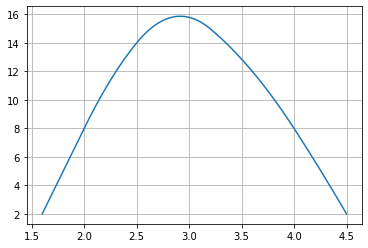

In [ ]:
plota_spline_quadratica(coefic1a, x1)

b. Obter e plotar o gráfico da spline cúbica que passa pelos pontos dados

Montamos as matrizes A e B...

In [ ]:
A1b, B1b = spline_cubica(x1, fx1)
A1b

array([[  8.   ,   4.   ,   2.   ,   1.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   8.   ,   4.   ,   2.   ,
          1.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,  15.625,   6.25 ,   2.5  ,
          1.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  15.625,   6.25 ,   2.5  ,   1.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  32.768,  10.24 ,   3.2  ,   1.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0

In [ ]:
B1b

array([ 8.,  8., 14., 14., 15., 15.,  8.,  8.,  2.,  2.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

... e utilizamos o método de eliminação de Gauss para solucionar o sistema e encontrar os coeficientes dos polinômios desejados

In [ ]:
coefic1b = gauss(A1b, B1b, True)
coefic1b

array([  -1.69815123,    8.15112592,    2.22990273,  -15.47909927,
         -5.75080347,   32.46703931,  -46.40192406,   16.94211859,
          1.60745831,  -22.71992403,   91.5654843 ,  -98.0307217 ,
          2.4087023 ,  -30.41186627,  116.17969947, -124.28588456,
          1.00495914,  -13.56694832,   48.80002767,  -34.44632215])

Finalmente, plotamos o gráfico da spline cúbica

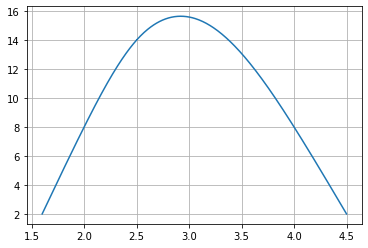

In [ ]:
plota_spline_cubica(coefic1b, x1)

c. Estimar o valor de f(2,8) pelos dois métodos referidos acima

Utilizando os coeficientes obtidos pela spline quadrática:

In [ ]:
x = 2.8
f1 = coefic1a[5]*(x**2) + coefic1a[6]*x + coefic1a[7]
print('O valor obtido de f(2,8) pela spline quadrática: ', f1)

O valor obtido de f(2,8) pela spline quadrática:  15.726530612244915


Utilizando os coeficientes obtidos pela spline cúbica:

In [ ]:
f2 = coefic1b[8]*(x**3) + coefic1b[9]*(x**2) + coefic1b[10]*x + coefic1b[11]
print('O valor obtido de f(2,8) pela spline cúbica: ', f2)

O valor obtido de f(2,8) pela spline cúbica:  15.515354832040089


# Questão 2

Utilizamos a função input_vector para definir os valores de **x** e **f(x)**

In [ ]:
x2, fx2 = input_vetor()

Quantidade de elementos da função: 6
elemento  1
x: 2
f(x):0.5
elemento  2
x: 3
f(x):0.3333
elemento  3
x: 4
f(x):0.25
elemento  4
x: 5
f(x):0.2
elemento  5
x: 6
f(x):0.1667
elemento  6
x: 7
f(x):0.1429
[2. 3. 4. 5. 6. 7.]
[0.5    0.3333 0.25   0.2    0.1667 0.1429]


Utilizamos a função de spline cúbica para criar as matrizes A e B 

In [ ]:
a2, b2 = spline_cubica(x2, fx2)

In [ ]:
a2

array([[  27.,    9.,    3.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,   27.,    9.,    3.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,   64.,   16.,    4.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   64.,
          16.,    4.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  125.,
          25.,    5.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  125.,   25.,    5.,    1.,    0.,    0.,
           0.,    0.],
       [  

In [ ]:
b2

array([0.3333, 0.3333, 0.25  , 0.25  , 0.2   , 0.2   , 0.1667, 0.1667,
       0.5   , 0.1429, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    ])

Utilizamos método de eliminação de gauss para solucionar o sistema e encontrar os coeficientes dos polinômios desejados

In [ ]:
coeficq2 = gauss(a2, b2, True)

In [ ]:
coeficq2

array([ 2.02306220e-02, -1.21383732e-01,  5.58368421e-02,  7.12016268e-01,
       -1.77531100e-02,  2.20469856e-01, -9.69723923e-01,  1.73757703e+00,
        6.81818182e-04, -7.49282297e-04, -8.48473684e-02,  5.57741627e-01,
       -1.57416268e-03,  3.30904306e-02, -2.54045933e-01,  8.39739234e-01,
       -1.58516746e-03,  3.32885167e-02, -2.55234450e-01,  8.42116268e-01])


Aproveitando a função criada para questão anterior, plotamos o gráfico para conhece a curva da função estudada



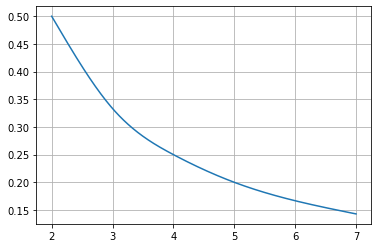

In [ ]:
plota_spline_cubica(coeficq2, x2)

a3.x³ + b3.x² + c3.x + d3 = 0,23

Então x é a raiz da equação a3.x³ + b3.x² + c3.x + d3 -0,23 = 0

In [ ]:
def f(x):
  return coeficq2[8]*(x**3) + coeficq2[9]*(x**2) + coeficq2[10]*x + coeficq2[11] - 0.23

Utilizamos método da bisseccao para resolver a equação obtida e descobrir o valor de x

In [ ]:
xq2 = bisseccao(4,5,f,0.0001)
xq2

4.361572265625

# Questão 3

Primeiramente, armazenamos os dados nas devidas variáveis:

In [ ]:
#x3, fx3 = input_vetor()
# Input utilizado originalmente

Quantidade de elementos da função: 36
elemento  1
x: 1
f(x):266
elemento  2
x: 2
f(x):145.9
elemento  3
x: 3
f(x):183.1
elemento  4
x: 4
f(x):119.3
elemento  5
x: 5
f(x):180.3
elemento  6
x: 6
f(x):168.5
elemento  7
x: 7
f(x):231.8
elemento  8
x: 8
f(x):224.5
elemento  9
x: 9
f(x):192.8
elemento  10
x: 10
f(x):122.9
elemento  11
x: 11
f(x):336.5
elemento  12
x: 12
f(x):185.9
elemento  13
x: 13
f(x):194.3
elemento  14
x: 14
f(x):149.5
elemento  15
x: 15
f(x):210.1
elemento  16
x: 16
f(x):273.3
elemento  17
x: 17
f(x):191.4
elemento  18
x: 18
f(x):287
elemento  19
x: 19
f(x):226
elemento  20
x: 20
f(x):303.6
elemento  21
x: 21
f(x):289.9
elemento  22
x: 22
f(x):421.6
elemento  23
x: 23
f(x):264.5
elemento  24
x: 24
f(x):342.3
elemento  25
x: 25
f(x):339.7
elemento  26
x: 26
f(x):440.4
elemento  27
x: 27
f(x):315.9
elemento  28
x: 28
f(x):439.3
elemento  29
x: 29
f(x):401.3
elemento  30
x: 30
f(x):437.4
elemento  31
x: 31
f(x):575.5
elemento  32
x: 32
f(x):407.6
elemento  33
x: 33
f(x):68

In [14]:
# Input mais prático
x3 = np.zeros((36), dtype='float')
aux = 0
for j in range(3):
  for i in range(12):
    
    x3[aux] = aux + 1
    aux = aux + 1

fx3= [266, 145.9, 183.1, 119.3,180.3, 168.5, 231.8, 224.5, 192.8, 122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 191.4, 226.0, 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9, 439.3, 401.3, 437.4, 575.5, 407.6, 682.0, 475.3, 581.3, 646.9]

fx3


[266,
 145.9,
 183.1,
 119.3,
 180.3,
 168.5,
 231.8,
 224.5,
 192.8,
 122.9,
 336.5,
 185.9,
 194.3,
 149.5,
 210.1,
 273.3,
 191.4,
 191.4,
 226.0,
 303.6,
 289.9,
 421.6,
 264.5,
 342.3,
 339.7,
 440.4,
 315.9,
 439.3,
 401.3,
 437.4,
 575.5,
 407.6,
 682.0,
 475.3,
 581.3,
 646.9]

Em seguida, montamos as matrizes A e B...

In [15]:
A3, B3 = spline_cubica(x3, fx3)
A3

array([[ 8.,  4.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  0.,  0.],
       [ 6.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.]])

In [16]:
B3

array([145.9, 145.9, 183.1, 183.1, 119.3, 119.3, 180.3, 180.3, 168.5,
       168.5, 231.8, 231.8, 224.5, 224.5, 192.8, 192.8, 122.9, 122.9,
       336.5, 336.5, 185.9, 185.9, 194.3, 194.3, 149.5, 149.5, 210.1,
       210.1, 273.3, 273.3, 191.4, 191.4, 191.4, 191.4, 226. , 226. ,
       303.6, 303.6, 289.9, 289.9, 421.6, 421.6, 264.5, 264.5, 342.3,
       342.3, 339.7, 339.7, 440.4, 440.4, 315.9, 315.9, 439.3, 439.3,
       401.3, 401.3, 437.4, 437.4, 575.5, 575.5, 407.6, 407.6, 682. ,
       682. , 475.3, 475.3, 581.3, 581.3, 266. , 646.9,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,

... e utilizamos o método de eliminação de Gauss para solucionar o sistema e encontrar os coeficientes dos polinômios desejados

In [17]:
coefic3 = gauss(A3, B3, True)
coefic3

array([ 5.23072965e+01, -1.56921890e+02, -1.54854069e+01,  3.86100000e+02,
       -1.04236483e+02,  7.82340786e+02, -1.89401076e+03,  1.63845023e+03,
        1.06338634e+02, -1.11283527e+03,  3.79151740e+03, -4.04707793e+03,
       -9.53180549e+01,  1.30704500e+03, -5.88800368e+03,  8.85895019e+03,
        7.73335852e+01, -1.28272960e+03,  7.06086933e+03, -1.27225048e+04,
       -6.61162859e+01,  1.29936808e+03, -8.43171676e+03,  1.82626673e+04,
        4.14315585e+01, -9.59136650e+02,  7.37781637e+03, -1.86262433e+04,
       -5.34099480e+01,  1.31705950e+03, -1.08317529e+04,  2.99326080e+04,
        1.58408233e+02, -4.40203139e+03,  4.06400652e+04, -1.24482846e+05,
       -2.58522986e+02,  8.10590518e+03, -8.44393005e+04,  2.92448373e+05,
        2.27983709e+02, -7.94881576e+03,  9.21626298e+04, -3.55092038e+05,
       -1.30211852e+02,  4.94622444e+03, -6.25778526e+04,  2.63869891e+05,
        8.06636975e+01, -3.27792198e+03,  4.43360508e+04, -1.99423690e+05,
       -3.38429382e+01,  

Finalmente, plotamos o gráfico com todas as splines

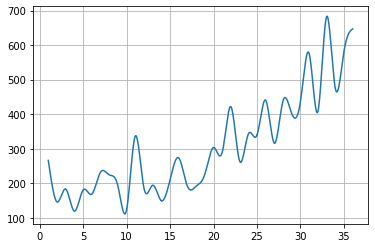

In [18]:
plota_spline_cubica(coefic3, x3)

In [19]:
# Qual o número de vendas no dia 14 de fevereiro do segundo ano?
coefic3[52]*(14.5**3) + coefic3[53]*(14.5**2) + coefic3[54]*14.5 + coefic3[55]

165.00277235844987

In [20]:
# E no dia 3 de março do terceiro ano?
dia = 27+(3/31)
coefic3[104]*(dia**3) + coefic3[105]*(dia**2) + coefic3[106]*dia + coefic3[107]

317.3356437510811